<a href="https://colab.research.google.com/github/meetdelvadiya/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction_Project_Meet_Delvadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters)

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius
RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in
Celsius 

Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time
import dateutil

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# mounting drive
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/data_application_energy.csv")

In [ ]:
dataset.shape

(19735, 29)

The Dataset has 19735 rows and 29 columns.

In [ ]:
#It gives first 5 rows of dataset
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#It gives last 5 rows of dataset
dataset.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
#It gives total columns, data types and null count of dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
date,object,0,19735
Appliances,int64,0,92
lights,int64,0,8
T1,float64,0,722
RH_1,float64,0,2547
T2,float64,0,1650
RH_2,float64,0,3376
T3,float64,0,1426
RH_3,float64,0,2618
T4,float64,0,1390


As shown above , there are no null values in the dataset

In [ ]:
dataset["exact_date"]=dataset['date'].str.split(' ').str[0]
dataset["days"]=(dataset['date'].str.split(' ').str[0])
dataset["days"]=(dataset['days'].apply(dateutil.parser.parse, dayfirst=True))
dataset["days"]=(dataset['days'].dt.day_name())

We are seperating 'days' and 'exact date' from 'date' column.

In [ ]:
dataset['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

There are many '0' values in 'lights' column so we will drop it. 
We are separating 'date' column into 'exact date' and 'days' so we will drop original 'date' column.



In [ ]:
dataset.drop(['date','lights'],axis=1,inplace=True)

In [ ]:
dataset.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,exact_date,days
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,Tuesday
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,Tuesday
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,Tuesday
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,Tuesday
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,Tuesday


In [ ]:
#It gives some basic statistical details like percentile, mean, std, max etc.
dataset.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Here, Appliances have mean value around 100 and minimum value is 10 whereas maximum is 1080. So we can ignore outliers.

In [ ]:
dataset.skew()

Appliances     3.386367
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

Here, Appliances have asymmetry in the distribution and we can say that the tail is larger towards the right hand side of the distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Appliance consumption in Wh')]

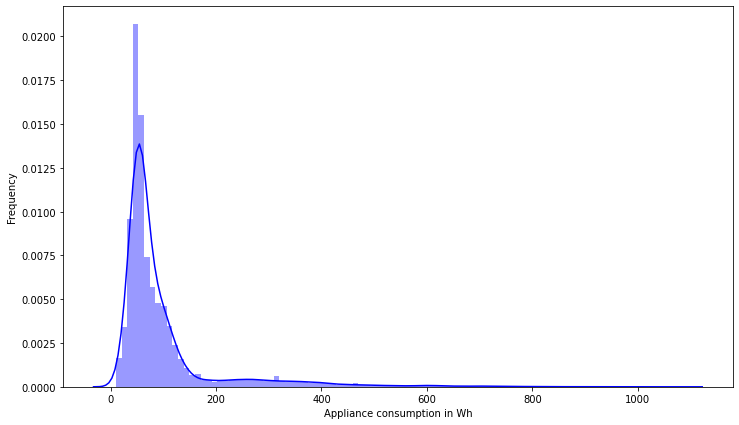

In [ ]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,7))
ax=sns.distplot(dataset['Appliances'],bins=100 ,color = 'blue')
ax.set(xlabel='Appliance consumption in Wh', ylabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Appliances log(wH)')

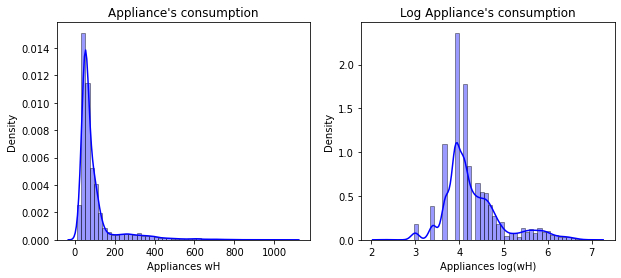

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,4))
sns.distplot((dataset['Appliances'] ), hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot((np.log(dataset['Appliances'])), hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

In [ ]:
print(dataset['Appliances'].mean())

97.6949581960983


Here, Appliances usage mean value is 97.69, So we are calculating Percentage of the Appliance Consumption which are less than 100 Wh(nearby 97.69).



In [ ]:
print('Percentage of the appliance consumption less than 100 Wh')
print(((dataset['Appliances'][dataset['Appliances'] <= 100].count()) / (len(dataset['Appliances'])))*100 )

Percentage of the appliance consumption less than 100 Wh
78.55079807448695


In [ ]:
dataset.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'exact_date', 'days'],
      dtype='object')

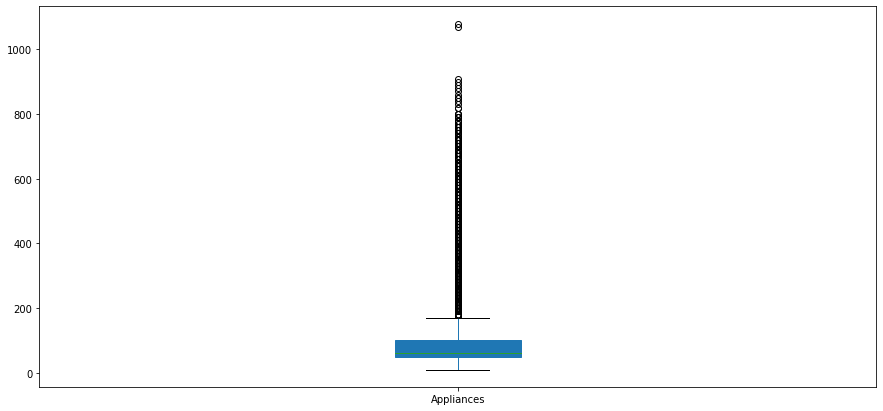

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["Appliances"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

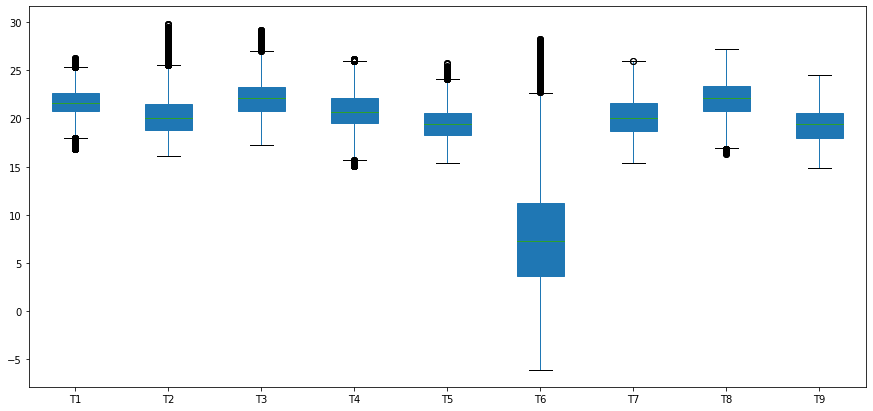

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

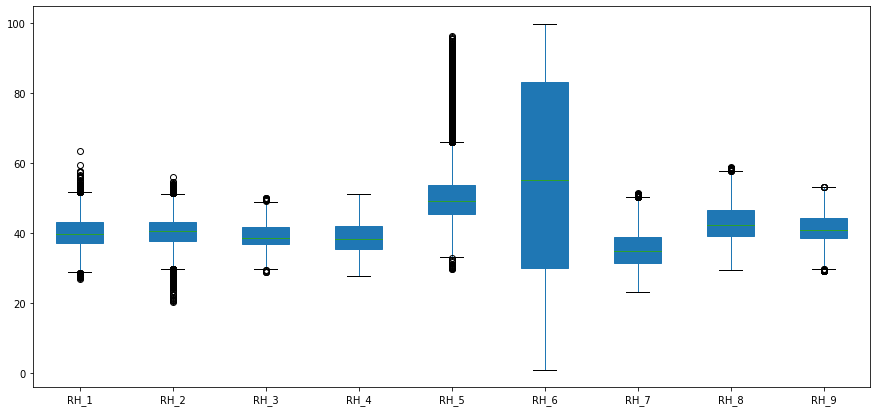

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

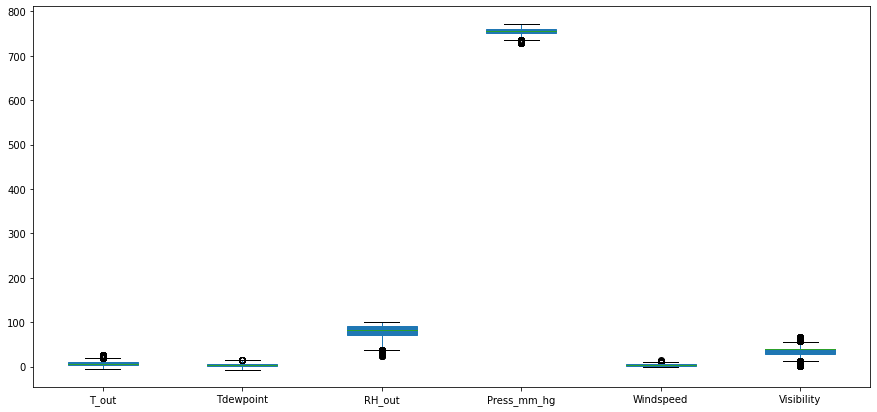

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

Here,we are removing two outliers from 'Appliances'.

In [ ]:
print(dataset['Appliances'].max())

1080


In [ ]:
dataset.drop(dataset[dataset['Appliances']==1080].index, inplace=True)

In [ ]:
print(dataset['Appliances'].max())

1070


In [ ]:
dataset.drop(dataset[dataset['Appliances']==1070].index, inplace=True)

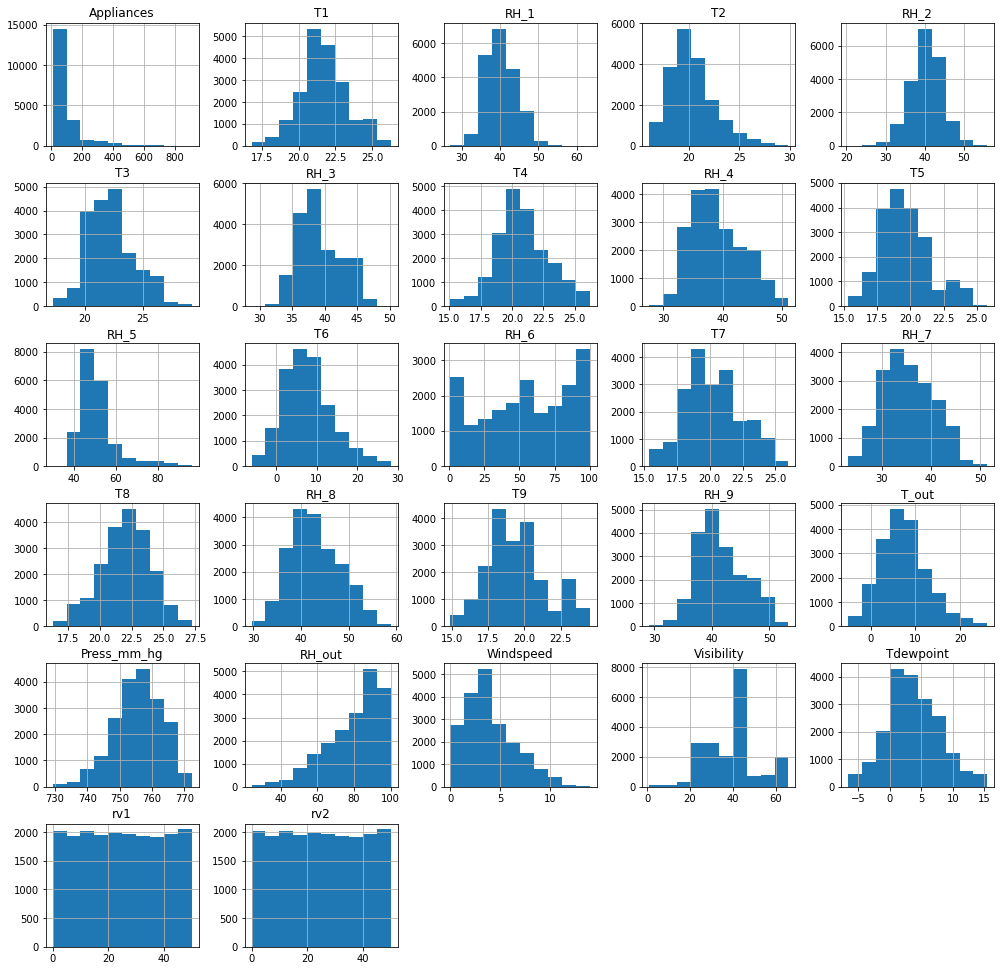

In [ ]:
# Histogram of all the features
dataset.hist(figsize= (17,17)) ;

In [ ]:
dates=dataset["exact_date"].unique()
arranged_day = pd.Categorical(dataset["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
day_series = pd.Series(arranged_day)

Adding 'days' from 'date' for analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


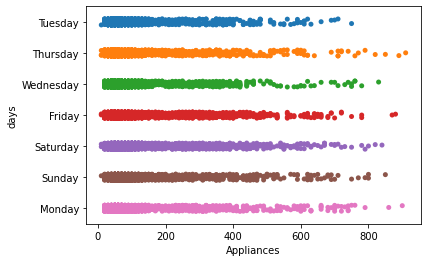

In [ ]:
plt.figure()
sns.stripplot(dataset['Appliances'], "days", data = dataset)

There is no relation of Appliances usage between Weekdays and Weekends so we can ignore 'days'.

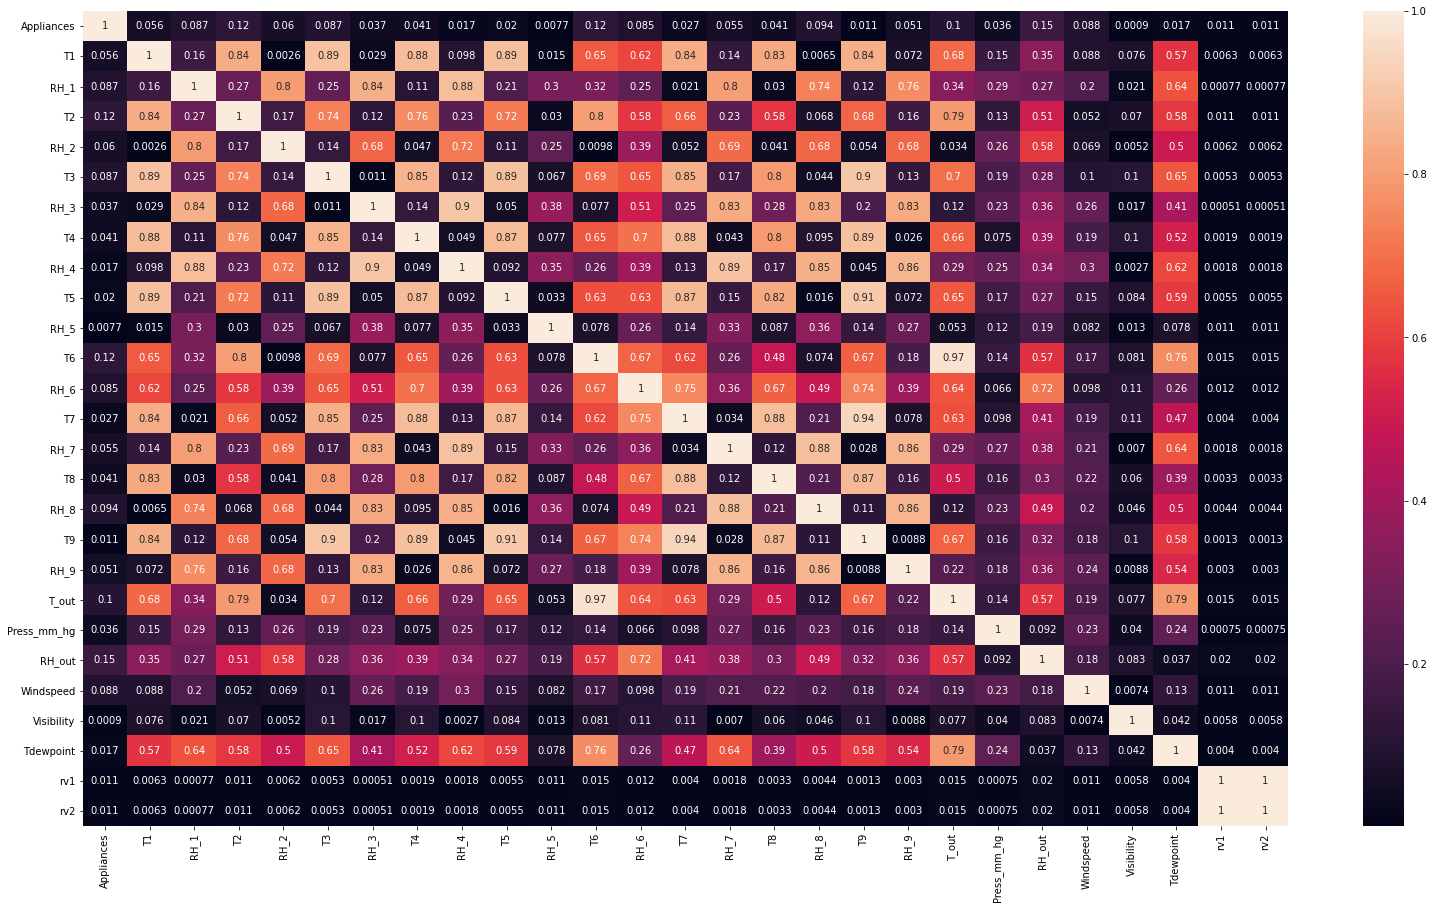

In [ ]:
 ## Correlation
plt.figure(figsize=(27,15))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True)

Here, Any feature of the Dataset doesn't have any significant correaltion with 
the Ouput.

All the  temperature variables have low and positive correlation with the target Appliances.

Random variable has not any significant relation with other features of dataset.
'T5','T6','T9' has high corelation with each other so it can be removed.

'Humidity', 'Tdewpoint', 'Press_mm_hg' have low correlation values.

We are dropping 'Visibility' also because of very very low corelation values.

In [ ]:
dataset.drop(['days','rv1','rv2','T5','T6','T9','Visibility'],axis=1,inplace=True)

In [ ]:
dataset.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint', 'exact_date'],
      dtype='object')

In [ ]:
dependent_variable = 'Appliances'
independent_variables = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
                          'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8','RH_9',
                         'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Tdewpoint']

In [ ]:
#Split data into train and test

In [ ]:
X = dataset[independent_variables]

In [ ]:
y = dataset[dependent_variable]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Regression:

In [ ]:
#train the model using the training sets
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(X_test)  
X_pred= regressor.predict(X_train) 

In [ ]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.13183072719129774
Test Score:  0.13910438255912083


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.483156068679804
Mean Squared Error: 8802.951364322402
Root Mean Squared Error: 93.8240447024237


In [ ]:
#As we can see, Linear regression gives very poor score.

Polynomial Regression:

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse= ",rmse)
print("r2 =",r2)

rmse=  67.11780343138759
r2 = 0.5674728907591662
